<a href="https://colab.research.google.com/github/ArpitShourya/Unemployment_prediction_using_different_ML_models/blob/main/Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
df=pd.read_csv('/content/Unemployment_Rate_M_Total.csv')

In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
dtype: int64

In [ ]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'India'],
      dtype=object)

In [ ]:
df[' Frequency'].unique()

array([' M'], dtype=object)

In [ ]:
df.drop([' Frequency'],axis=1,inplace=True)
df.drop(df[(df['Region'] =='India')].index, inplace=True)
df = df.reset_index(drop=True)

In [ ]:
df.sample(5)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
1315,Meghalaya,30-06-2020,1.15,1350794,58.31
1691,Rajasthan,28-02-2023,28.34,19573648,43.82
2029,Uttar Pradesh,31-10-2020,3.75,56539521,35.49
828,Jammu & Kashmir,30-11-2020,8.55,3105513,32.07
1723,Sikkim,31-07-2021,0.00,291920,48.99


In [ ]:
j=0
for i in df[' Date']:
  df[' Date'][j]=i[7:11]
  j=j+1

<ipython-input-7-3f3c8d6294ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Date'][j]=i[7:11]


In [ ]:
df[' Date'].unique()

array(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [ ]:
df.rename(columns={' Date':'Year',' Region':'Region',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [ ]:
df.sample(5)

,Region,Year,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
607,Haryana,2016,6.67,8100227,42.41
803,Jammu & Kashmir,2018,13.21,3551156,40.82
2016,Uttar Pradesh,2019,8.11,57838879,39.14
569,Gujarat,2020,3.41,24978668,48.34
804,Jammu & Kashmir,2018,14.58,3277483,38.20


1. Checking Outliers

<Axes: >

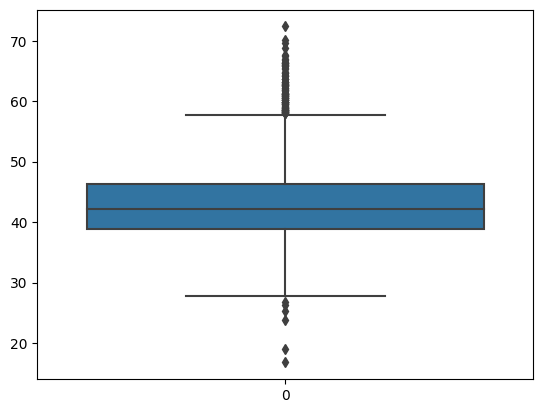

In [ ]:
sns.boxplot(df['Estimated Labour Participation Rate (%)'])

In [ ]:
Q1 = df['Estimated Labour Participation Rate (%)'].quantile(0.25)
Q3 = df['Estimated Labour Participation Rate (%)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR


# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Estimated Labour Participation Rate (%)']>=upper)[0]
lower_array = np.where(df['Estimated Labour Participation Rate (%)']<=lower)[0]

# Removing the outliers
df = df[~df.index.isin(upper_array)]
df = df[~df.index.isin(lower_array)]
df = df.reset_index(drop=True)

<Axes: >

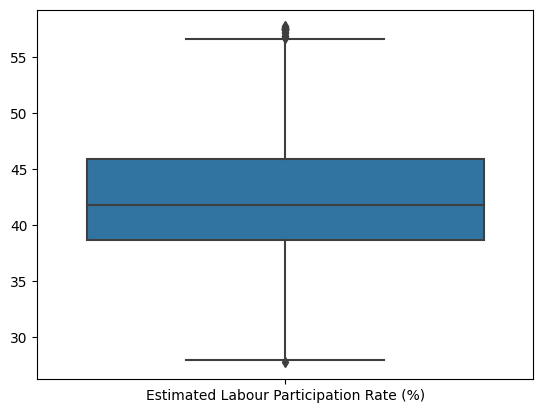

In [ ]:
boxplot_df = pd.DataFrame(df['Estimated Labour Participation Rate (%)'])
sns.boxplot(data=boxplot_df)

<Axes: >

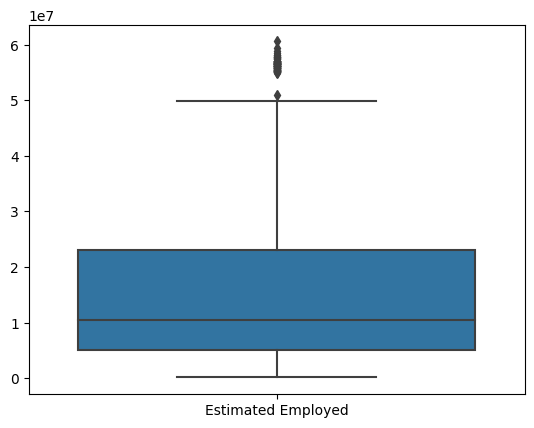

In [ ]:
boxplot_df = pd.DataFrame(df['Estimated Employed'])
sns.boxplot(data=boxplot_df)

In [ ]:
Q1 = df['Estimated Employed'].quantile(0.25)
Q3 = df['Estimated Employed'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Estimated Employed']>=upper)[0]
lower_array = np.where(df['Estimated Employed']<=lower)[0]

# Removing the outliers
df = df[~df.index.isin(upper_array)]
df = df[~df.index.isin(lower_array)]
df = df.reset_index(drop=True)

<Axes: >

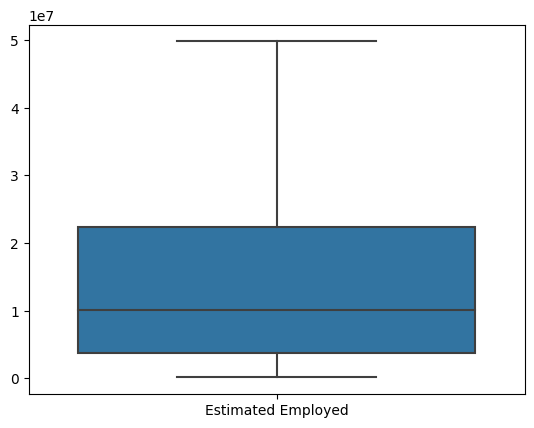

In [ ]:
boxplot_df = pd.DataFrame(df['Estimated Employed'])
sns.boxplot(data=boxplot_df)

In [ ]:
df.shape

(2037, 5)

2. Scaling of Data

In [ ]:
df['Estimated Labour Participation Rate (%)'].describe()

count    2037.000000
mean       42.518174
std         5.508030
min        27.760000
25%        38.820000
50%        42.100000
75%        45.990000
max        57.720000
Name: Estimated Labour Participation Rate (%), dtype: float64

array([[<Axes: title={'center': 'Estimated Labour Participation Rate (%)'}>]],
      dtype=object)

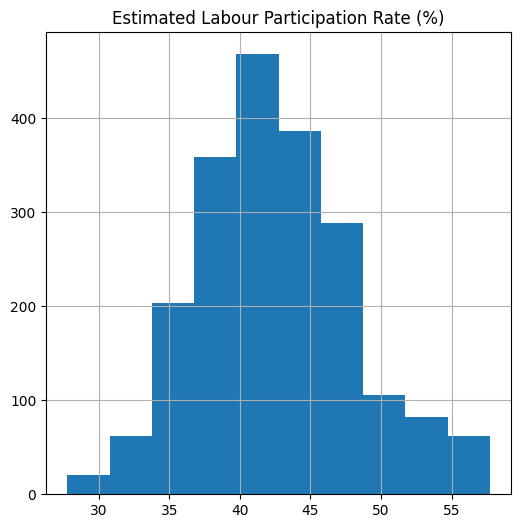

In [ ]:
df.hist(figsize=(6,6), column=['Estimated Labour Participation Rate (%)'])

<ipython-input-20-6b0f72028935>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estimated Labour Participation Rate (%)'][i]=(df['Estimated Labour Participation Rate (%)'][i]-df['Estimated Labour Participation Rate (%)'].min())/(df['Estimated Labour Participation Rate (%)'].max()-df['Estimated Labour Participation Rate (%)'].min())


array([[<Axes: title={'center': 'Estimated Labour Participation Rate (%)'}>]],
      dtype=object)

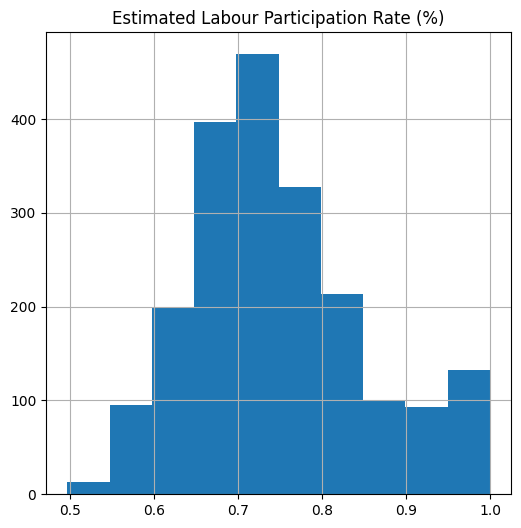

In [ ]:
i=0
while i!=2037:
  df['Estimated Labour Participation Rate (%)'][i]=(df['Estimated Labour Participation Rate (%)'][i]-
                                                    df['Estimated Labour Participation Rate (%)'].min())/
                                                     (df['Estimated Labour Participation Rate (%)'].max()-
                                                      df['Estimated Labour Participation Rate (%)'].min())
  i=i+1
df.hist(figsize=(6,6), column=['Estimated Labour Participation Rate (%)'])

In [ ]:
df['Estimated Labour Participation Rate (%)'].describe()

count    2037.000000
mean        0.746615
std         0.103497
min         0.496442
25%         0.675309
50%         0.730705
75%         0.803228
max         1.000000
Name: Estimated Labour Participation Rate (%), dtype: float64

In [ ]:
df['Estimated Employed'].describe()

count    2.037000e+03
mean     1.406748e+07
std      1.136592e+07
min      1.175420e+05
25%      3.773961e+06
50%      1.015304e+07
75%      2.231002e+07
max      4.980190e+07
Name: Estimated Employed, dtype: float64

array([[<Axes: title={'center': 'Estimated Employed'}>]], dtype=object)

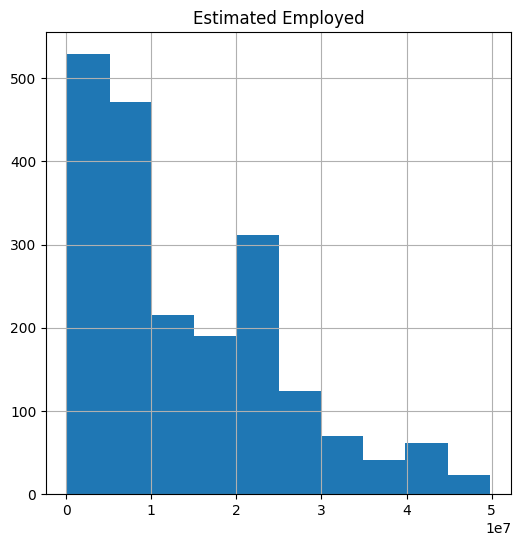

In [ ]:
df.hist(figsize=(6,6), column=['Estimated Employed'])

<ipython-input-24-7a85e17dfd15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estimated Employed'][i]=(df['Estimated Employed'][i]-df['Estimated Employed'].min())/(df['Estimated Employed'].max()-df['Estimated Employed'].min())


array([[<Axes: title={'center': 'Estimated Employed'}>]], dtype=object)

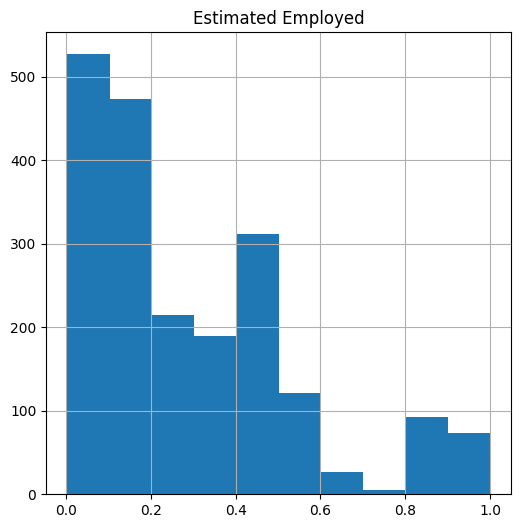

In [ ]:
i=0
while i!=2037:
  df['Estimated Employed'][i]=(df['Estimated Employed'][i]-df['Estimated Employed'].min())/(df['Estimated Employed'].max()-df['Estimated Employed'].min())
  i=i+1
df.hist(figsize=(6,6), column=['Estimated Employed'])

In [ ]:
df['Estimated Employed'].describe()

count    2037.000000
mean        0.292471
std         0.247511
min         0.002360
25%         0.087287
50%         0.203868
75%         0.447975
max         1.000000
Name: Estimated Employed, dtype: float64

In [ ]:
df['Estimated Unemployment Rate (%)'].describe()

count    2037.000000
mean        8.342459
std         7.180053
min         0.000000
25%         3.610000
50%         6.270000
75%        11.150000
max        75.850000
Name: Estimated Unemployment Rate (%), dtype: float64

array([[<Axes: title={'center': 'Estimated Unemployment Rate (%)'}>]],
      dtype=object)

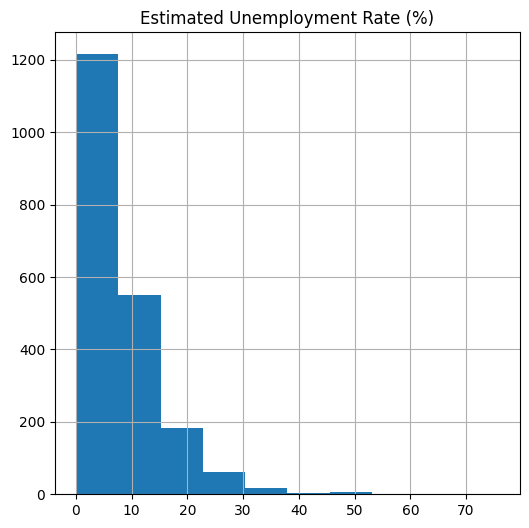

In [ ]:
df.hist(figsize=(6,6), column=['Estimated Unemployment Rate (%)'])

<ipython-input-28-0baeb160fb92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estimated Unemployment Rate (%)'][i]=(df['Estimated Unemployment Rate (%)'][i]-df['Estimated Unemployment Rate (%)'].min())/(df['Estimated Unemployment Rate (%)'].max()-df['Estimated Unemployment Rate (%)'].min())


array([[<Axes: title={'center': 'Estimated Unemployment Rate (%)'}>]],
      dtype=object)

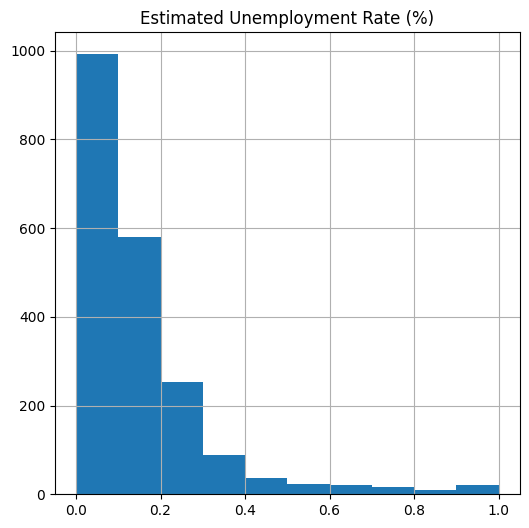

In [ ]:
i=0
while i!=2037:
  df['Estimated Unemployment Rate (%)'][i]=(df['Estimated Unemployment Rate (%)'][i]-
                                            df['Estimated Unemployment Rate (%)'].min())
                                            /(df['Estimated Unemployment Rate (%)'].max()
                                            -df['Estimated Unemployment Rate (%)'].min())
  i=i+1
df.hist(figsize=(6,6), column=['Estimated Unemployment Rate (%)'])

In [ ]:
df['Estimated Unemployment Rate (%)'].describe()

count    2037.000000
mean        0.151551
std         0.160438
min         0.000000
25%         0.052999
50%         0.103494
75%         0.186233
max         1.000000
Name: Estimated Unemployment Rate (%), dtype: float64

Our target variable will be "Estimated Unemployment Rate(%)". The rest will be our deciding variables.

# **EDA**

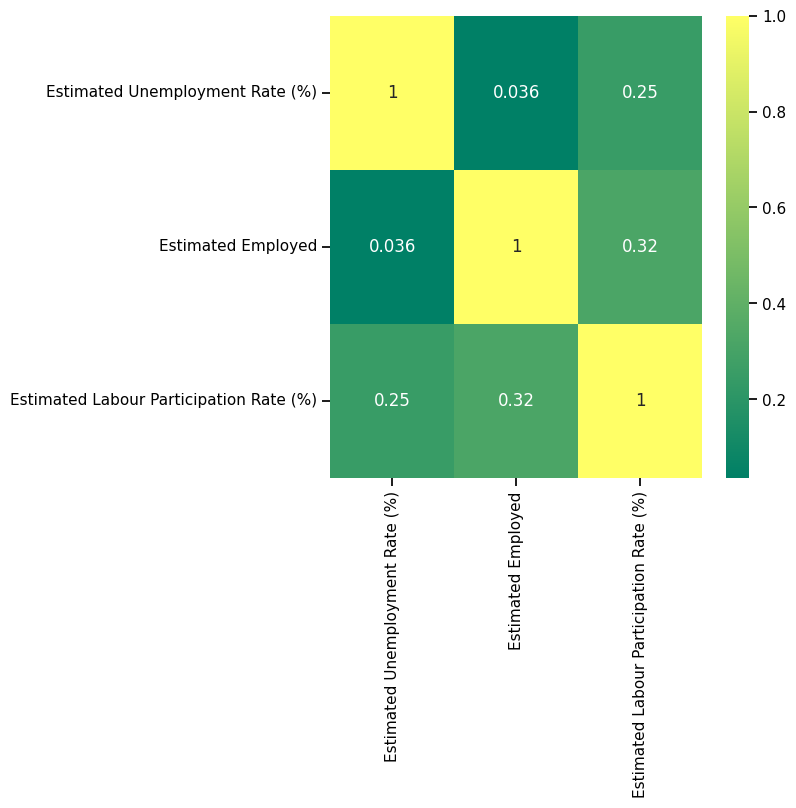

In [ ]:
heat_maps = df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

In [ ]:
region_stats_year = df.groupby(['Region','Year'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean().reset_index()
region_stats_year = round(region_stats_year,2)
region_stats_year

,Region,Year,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2016,0.09,0.39,0.88
1,Andhra Pradesh,2017,0.05,0.37,0.80
2,Andhra Pradesh,2018,0.06,0.34,0.74
3,Andhra Pradesh,2019,0.06,0.34,0.71
4,Andhra Pradesh,2020,0.11,0.31,0.67
...,...,...,...,...,...
196,West Bengal,2019,0.29,0.94,0.99
197,West Bengal,2020,0.45,0.89,0.95
198,West Bengal,2021,0.72,0.92,0.97
199,West Bengal,2022,0.85,0.97,0.97


In [ ]:
fig = px.bar(region_stats_year, x='Region',y='Estimated Unemployment Rate (%)',animation_frame = 'Year',color='Region',
            title='Average Unemployment rate across region(per year)', height=700,template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

In [ ]:
fig = px.sunburst(df, path=['Region'], values='Estimated Unemployment Rate (%)',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each Region',
                  height=650,template='ggplot2')


fig.show()

# **Model Training and Building**

In [ ]:
#One-hot encoding
df = pd.get_dummies(df, columns = ['Region', 'Year'])

In [ ]:
df.sample(5)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Andhra Pradesh,Region_Assam,Region_Bihar,Region_Chhattisgarh,Region_Delhi,Region_Goa,Region_Gujarat,...,Region_Uttarakhand,Region_West Bengal,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023
188,0.066447,0.574902,0.704437,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1706,0.041541,0.563512,0.778025,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1390,0.039552,0.010756,0.844197,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1078,0.085036,0.191883,0.618514,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
777,0.233223,0.071548,0.775267,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.shape

(2037, 38)

In [ ]:
X = df.drop('Estimated Unemployment Rate (%)', axis=1)
y = df['Estimated Unemployment Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Linear Regressor

In [ ]:
Linear_reg_model=LinearRegression()
Linear_reg_model.fit(X,y)

LinearRegression()

In [ ]:
mae=cross_val_score(Linear_reg_model,X_train,y_train, scoring='neg_mean_absolute_error', cv=10)
np.mean(mae)

-32990381.849071693

In [ ]:
mse=cross_val_score(Linear_reg_model,X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
np.mean(mse)

-1.774035423103319e+18

In [ ]:
y_pred=Linear_reg_model.predict(X_test)

<ipython-input-43-ec4621a522f8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Density'>

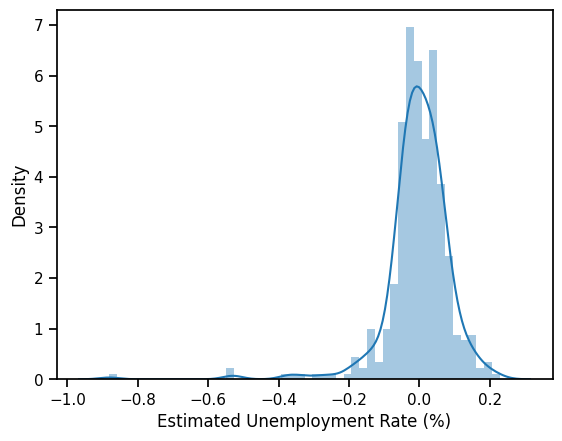

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
score_lr=r2_score(y_pred,y_test)

In [ ]:
score_lr

0.5594141463728004

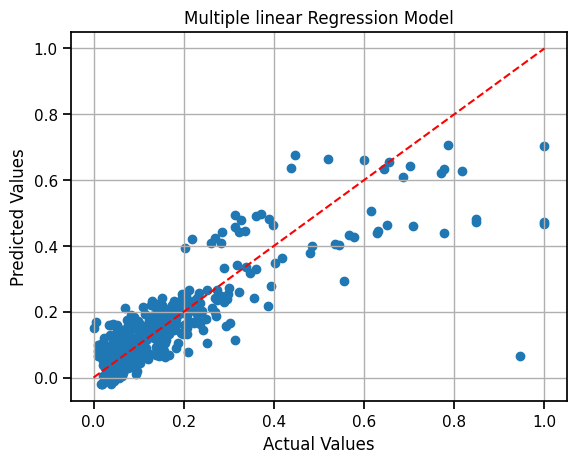

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple linear Regression Model')
plt.grid(True)
plt.show()

2. KNN Model

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

<ipython-input-48-ec4621a522f8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Density'>

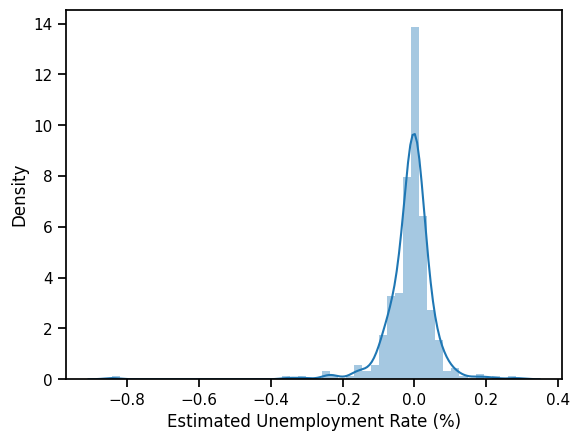

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
mae=cross_val_score(knn_model,X_train,y_train, scoring='neg_mean_absolute_error', cv=10)
np.mean(mae)

-0.04591719266633794

In [ ]:
mse=cross_val_score(knn_model,X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
np.mean(mse)

-0.008087346880392502

In [ ]:
score_knn=r2_score(y_pred,y_test)

In [ ]:
score_knn

0.7871491538780709

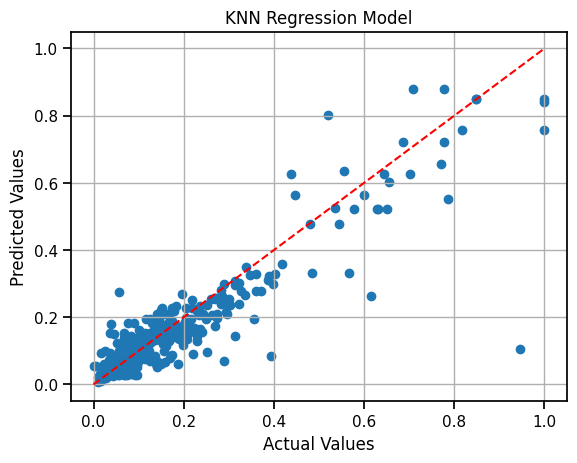

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression Model')
plt.grid(True)
plt.show()

3. SVR model

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

<ipython-input-56-ec4621a522f8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Density'>

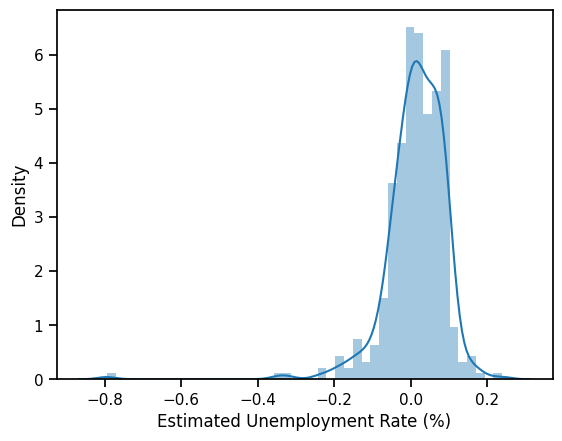

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
mae=cross_val_score(svr_model,X_train,y_train, scoring='neg_mean_absolute_error', cv=10)
np.mean(mae)

-0.06330724265812257

In [ ]:
mse=cross_val_score(svr_model,X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
np.mean(mse)

-0.009668312889950632

In [ ]:
score_svr=r2_score(y_pred,y_test)

In [ ]:
score_svr

0.7007257265909861

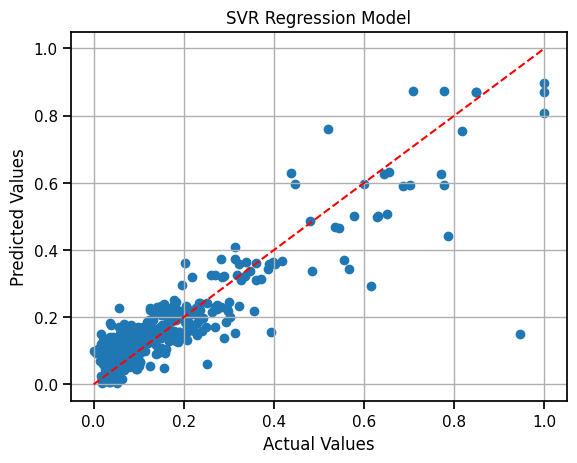

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Regression Model')
plt.grid(True)
plt.show()

4. Ensemble voting regressor

In [ ]:
voting_reg=VotingRegressor(estimators=[('svm',svr_model),('knn',knn_model)])

In [ ]:
voting_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('svm', SVR()), ('knn', KNeighborsRegressor())])

In [ ]:
y_pred = voting_reg.predict(X_test)

<ipython-input-66-ec4621a522f8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Density'>

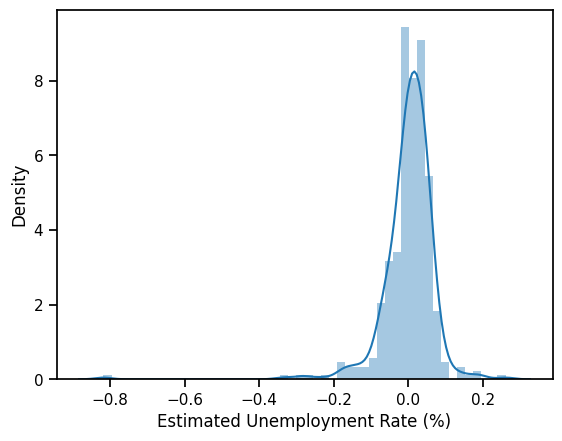

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
mae=cross_val_score(voting_reg,X_train,y_train, scoring='neg_mean_absolute_error', cv=10)
np.mean(mae)

-0.05116222844613375

In [ ]:
mse=cross_val_score(voting_reg,X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
np.mean(mse)

-0.008164999163301039

In [ ]:
score_voting=r2_score(y_pred,y_test)

In [ ]:
score_voting

0.7717436942891198

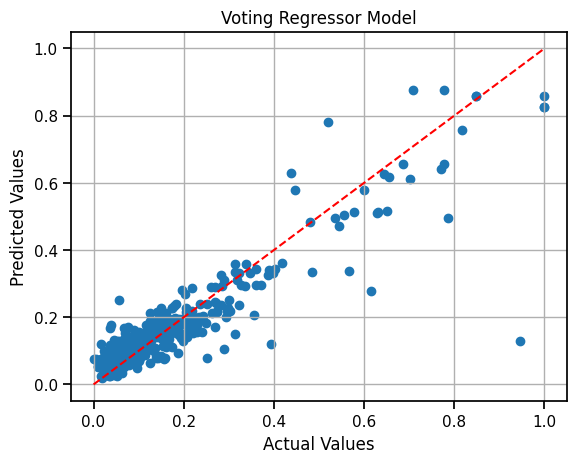

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Voting Regressor Model')
plt.grid(True)
plt.show()

**We can say that individually knn performs well**

In [ ]:
accuracy_bar={'Linear Regression':score_lr*100,'KNN':score_knn*100,'SVR':score_svr*100,'Ensemble':score_voting*100}

In [ ]:
print(accuracy_bar)

{'Linear Regression': 55.94141463728004, 'KNN': 78.7149153878071, 'SVR': 70.07257265909861, 'Ensemble': 77.17436942891199}


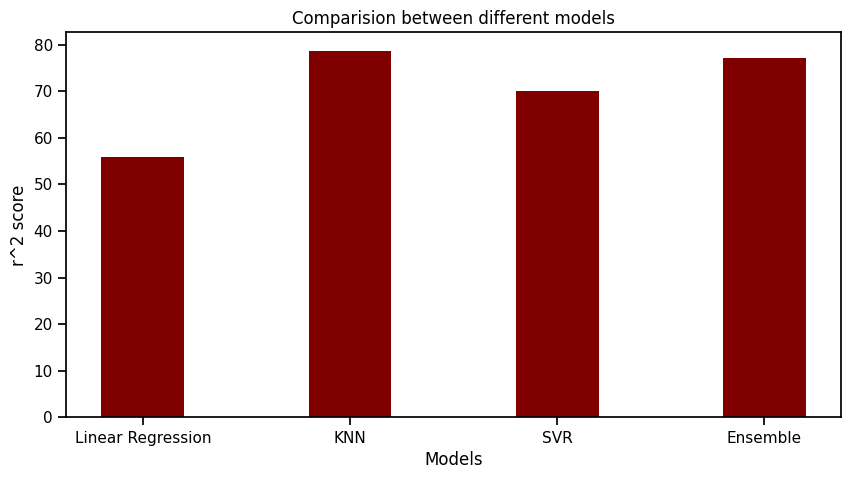

In [ ]:
mod_name = list(accuracy_bar.keys())
mod_acc = list(accuracy_bar.values())
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(mod_name, mod_acc, color ='maroon',width = 0.4)

plt.xlabel("Models")
plt.ylabel("r^2 score")
plt.title("Comparision between different models")
plt.show()